In [1]:
###############################
# Model Machine with FLAME    #
###############################
# 7APRIL2020: crispd
###############################
#CONTENTS:
# Import modules
# Setup working directory, and necessary latfile handle
# Setup 'machine' and 'state'
# Setup 'observers', run model, plot envelope
# Output device values used in model

In [14]:
import os
from pathlib import Path
#from flame import Machine
import flame
from flame import Machine #Machine() not found without this line
import flame_utils
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

In [15]:
#
# Set-up working directory, and lattice file handle
#

# current working dir
cwd = os.getcwd()

# locate phantasy-machines, and flame (if not found, search rea-files parent directory, or rea3/data/CrispAnalysis/phantasy-machines)
flamedir = os.path.dirname(os.path.abspath(flame.__file__))
if os.path.isfile(flamedir):
    flamedata = flamedir + '/data'
    os.unlink(cwd + '/data')
    os.symlink(flamedata, cwd + '/data')

# define latfile
latfile = "template.lat"
latpath = str(Path(cwd).parent) + '/phantasy-machines/ReA/LEBT/' + latfile
print(latpath)
latfile_handle = open(latpath, 'rb')
print(cwd)

/projects/rea3/data/CrispAnalysis/phantasy-machines/ReA/LEBT/template.lat
/projects/rea3/data/CrispAnalysis/rea-files


In [16]:
# create FLAME machine
m = Machine(latfile_handle)

# create BeamState object
bs = flame_utils.BeamState(machine=m)

# create ModelFlame object
fm = flame_utils.ModelFlame()

ERROR: 2020-09-10 22:35:19,078: flame_utils.core.model: invalid file: None


In [17]:
# setup machine and state
fm.bmstate, fm.machine = bs, m

In [23]:
m.reconfigure(0, {'IonEk': 12000})

In [27]:
m.conf()

OrderedDict([('Eng_Data_Dir', '/etc/flame/cavity_data'),
             ('HdipoleFitMode', 1.0),
             ('IonChargeStates', array([ 0.25])),
             ('IonEk', 500000.0),
             ('IonEs', 931494000.0),
             ('MpoleLevel', 2.0),
             ('NCharge', array([ 1000.])),
             ('P0', array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.])),
             ('S0',
              array([  1.80000000e+00,   3.00000000e-03,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   3.00000000e-03,   7.20000000e-06,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   1.80000000e+00,   3.00000000e-03,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   3.00000000e-03,
                      

In [24]:
# setup observers and run flame model
#obs = fm.get_index_by_type(type='bpm')['bpm']
#obs = fm.get_index_by_type(type='marker')['marker']
obs = range(len(fm.machine))
r,s = fm.run(monitor=obs)

# get data of interest from running results
data = fm.collect_data(r, pos=True, x0_env=True, x0_rms=True, y0_env=True, y0_rms=True, ref_IonEk=True)

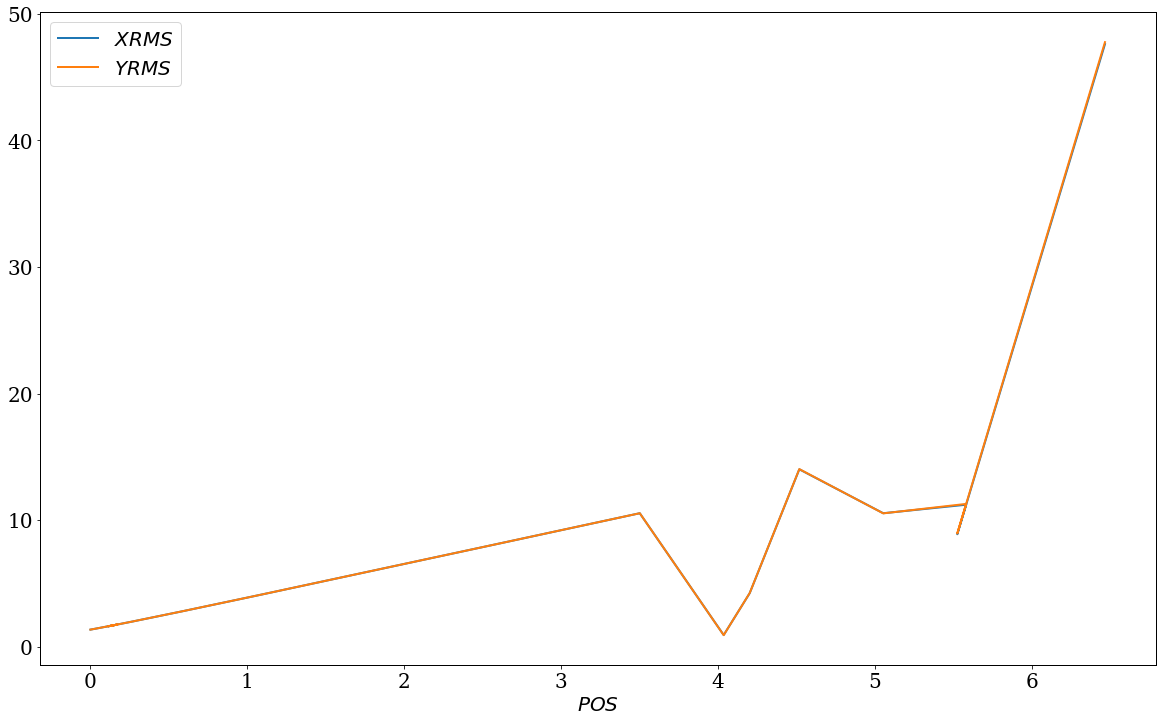

{'pos': array([  0.       ,   0.035    ,   0.035    ,   0.170256 ,   0.170256 ,
          0.114071 ,   0.114071 ,   0.152425 ,   0.152425 ,   0.2084548,
          0.2384548,   0.2384548,   0.2384548,   0.2684548,   0.4114228,
          0.5614228,   0.5864288,   0.7364288,   0.7364288,   0.7364288,
          0.7614348,   0.9114348,   1.0044662,   1.0734662,   1.0734662,
          1.1424662,   2.0980972,   2.2480972,   2.2731032,   2.4231032,
          2.4231032,   2.4231032,   2.4481092,   2.5981092,   2.5981092,
          2.9847412,   2.9847412,   3.0271472,   3.0271472,   3.0093162,
          3.0093162,   3.0672351,   3.0972351,   3.0972351,   3.0972351,
          3.1272351,   3.1629519,   3.1979519,   3.5014889,   4.0363449,
          4.2021169,   4.3521169,   4.3521169,   4.5183889,   5.0532449,
          5.0532449,   5.5818809,   5.5818809,   5.5640499,   5.5640499,
          5.5252209,   5.5252209,   5.6112507,   5.6112507,   5.6200797,
          5.6500797,   5.6500797,   5.650079

In [26]:
# or use plot_orbit function...
from phantasy.tools import plot_orbit
plot_orbit(('pos', 'xrms'), ('pos', 'yrms'), flame_model=fm)